# Linear regression 1

In this notebook, we recall some basic facts about vectors and matrices. Our motivation is to understand the linear regression model, which is a simple yet powerful tool for predicting a continuous target variable. To illustrate the concepts, we will use the concrete compressive strength dataset `../data/regression/concrete_compressive_strength/train.csv`. 

As usual, we begin by importing the necessary libraries and loading the dataset.

In [1]:
# import libraries for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import the concrete compressive strength dataset
df = pd.read_csv('../data/regression/concrete_compressive_strength/train.csv')

# display some info
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset.')
df.head()

There are 824 rows and 9 columns in the dataset.


,X1,X2,X3,X4,X5,X6,X7,X8,Y
0,173.8,93.4,159.9,172.3,9.7,1007.2,746.6,28,37.81
1,355.0,19.0,97.0,145.0,13.1,967.0,871.0,28,44.03
2,134.7,0.0,165.7,180.2,10.0,961.0,804.9,28,13.29
3,212.6,0.0,100.4,159.4,10.4,1003.8,903.8,100,47.74
4,150.0,237.0,0.0,174.0,12.0,1069.0,675.0,28,37.43


## Preliminaries

### The space $\mathbb{R}^n$
Let $S_1,\dotsc,S_n$ be a finite collection of non-empty sets. The *direct* (or *Cartesian*) *product* of these sets is the set
$$S_1 \times \dotsb \times S_n = \{ (x_1,\dotsc,x_n) \mid x_i \in S_i \textup{ for } i=1,\dotsc,n \}.$$
The reason for the "$\times$" notation is that if each $S_i$ is a finite set (of size $|S_i|$), then the size of the direct product is the product of the sizes: $$|S_1 \times \dotsb \times S_n| = |S_1| \times \dotsb \times |S_n|.$$

The real line is denoted $\mathbb{R}$, and sometimes, $\mathbb{R}^1$. The notation $\mathbb{R}^n$ represents the direct product of $\mathbb{R}$ with itself $n$ times:
\begin{align*}
    \mathbb{R}^n & \coloneqq \underbrace{\mathbb{R} \times \dotsb \times \mathbb{R}}_{n \textup{ copies}} \\
                & = \{ (x_1,\dotsc,x_n) \mid x_1,\dotsc,x_n \in \mathbb{R} \}.
\end{align*}
These are the most intuitive spaces to do geometry and visualize things, and as such, elements of $\mathbb{R}^n$ are often referred to as *points*. For example, $\mathbb{R}^1$ is simply the real line, $\mathbb{R}^2$ is a plane, $\mathbb{R}^3$ is an abstract representation of physical 3d-space, and so on.

### Vectors
When we want to do arithmetic with points in $\mathbb{R}^n$, such as addition and multiplication, it becomes appropriate to consider them as **vectors**. Informally, a vector is an arrow that starts at the origin and ends at some point. For us, vectors will always mean (unless otherwise specified) ***column vectors**, denoted as follows:
\begin{equation*}
    \mathbf{x} = \begin{bmatrix} x_1 \\ \vdots \\ x_n \end{bmatrix} \in \mathbb{R}^n.
\end{equation*}
When we want to instead work with **row vectors**, we use the superscript "$(\cdot)^T$" (for **transpose**) to denote our vector:
\begin{equation*}
    \mathbf{x}^T = [x_1 \, \dotsb \, x_n] \in \mathbb{R}^n.
\end{equation*}
Since the transpose of a row is a column, the notation $\mathbf{x} = [x_1 \, \dotsb \, x_n]^T$ means that $\mathbf{x}$ is a column vector.

### Rows and columns of datasets
Suppose we have a ML provlem with features $X_1,\dotsc,X_n$ and target $Y$. For simplicity, assume that all features and target are continuous variables. Suppose there are $m$ instances or observations for which we know the values of $X_1,\dotsc,X_n,Y$. These values can be put together into a labelled dataset that looks like:
\begin{equation*}
    \begin{bmatrix}
        x_{11}  & \dotsb & x_{1n} & y_1\\
        \vdots  & \ddots & \vdots & \vdots\\
        x_{m1}  & \dotsb & x_{mn} & y_m
    \end{bmatrix}.
\end{equation*}
We write $\mathbb{R}^{m \times n}$ to denote the set of $m\times n$ matrices. The **design matrix** is the $m \times n$ matrix $$X = [x_{ij}] \in \mathbb{R}^{m \times n}.$$ (This notation means that the entry in $i$-th row and $j$-th column is $x_{ij}$.) Denoting the first column of the dataset as $\mathbf{1} \in \mathbb{R}^m$, we can write the dataset as
\begin{equation*}
    \textup{Dataset } = \begin{bmatrix} \; X & \mathbf{y} \; \end{bmatrix} \in \mathbb{R}^{m \times (n+1)}.
\end{equation*}
Let's examine the rows and columns for a moment.
- **Rows.** Observe that the $i$-th row of $X$ is
\begin{equation*}
    \mathbf{x}_i^T = \begin{bmatrix} \; x_{i1} & \dotsb & x_{in} \; \end{bmatrix} \in \mathbb{R}^n.
\end{equation*}
NOTE: we think of $\mathbf{x}_i$ as a column vector, so that $\mathbf{x}_i^T$ is a row vector (the actual row in the dataset).
By the **feature space**, we mean the space $\mathbb{R}^n$ of all possible row vectors. The $i$-th vector $\mathbf{x}_i^T$ in the feature space corresponds to an instance, and the $j$-th coordinate of $\mathbf{x}_i^T$ records the value of $X_j$ for that instance. 
- **Columns.**  The columns of $X$ are vectors in $\mathbb{R}^m$; each column $\mathbf{v}_j$ corresponds to the feature $X_j$. The last column $\mathbf{y} \in \mathbb{R}^m$ corresponds to the target. We often summarize this info by writing
\begin{equation*}
    \textup{Dataset } = \begin{bmatrix} \; \mathbf{v}_1 & \dotsb & \mathbf{v}_n & \mathbf{y} \; \end{bmatrix} = \begin{bmatrix} \; X & \mathbf{y} \; \end{bmatrix} \in \mathbb{R}^{m \times n}.
\end{equation*}

### Our framework for ML
Recall that in our framework of supervised ML (in particular, regression), there exists a "ground truth" function $\mathbf{F}$ from the feature space $\mathbb{R}^n$ to the target space $\mathbb{R}$ (space of possible $Y$-values) such that, for every row $(\mathbf{x}^T,y) \in \mathbb{R}^n \times \mathbb{R}$, we have
\begin{equation*}
    y = \mathbf{F}(\mathbf{x}) + \epsilon,
\end{equation*}
where $\epsilon$ is some small error term. 

For example, in our current dataset `df`, there are $n=8$ features, so our feature space is $\mathbb{R}^8$. 

We assume moreover that $\mathbf{F}$ is of the form $F_{\mathbf{w}}$, where $\{F_{\mathbf{w}}\}$ is a class of functions parameterized by some vector $\mathbf{w} \in \mathbb{R}^k$ of parameters (these are simply coefficients appearing in the function). Here, $k$ is some positive integer. Recall then that in order to make the best predictions, we need to "fit the model to the data", which means that we find the best parameters $\hat{\mathbf{w}}$ such that the predictions $F_{\hat{\mathbf{w}}}(\mathbf{x})$ are as close as possible to the true target $y$. To make this precise, we define a **loss function** $J(\mathbf{w})$ that measures the distance between the predictions and the true target. The "best-fit" parameters are then the ones that minimize the loss function:
\begin{equation*}
    \hat{\mathbf{w}} = \argmin_{\mathbf{w} \in \mathbb{R}^k} J(\mathbf{w}).
\end{equation*}

### Loss functions for regression
Let us denote
\begin{equation*}
    \hat{y}_i = F_{\mathbf{w}}(\mathbf{x}_i)
\end{equation*}
for the predicted value of the target for the $i$-th instance. (Note that $\hat{y}_i$ depends on the parameters $\mathbf{w}$.)  The **residual** is the difference between the true target $y_i$, and the predicted target: $$\epsilon_i = y_i - \hat{y}_i, \quad \textup{ for } i=1,\dotsc,m.$$ Our loss function will be a function of the residuals which (in some precise, sensible way) measures how small the residuals are. This is accomplished using a general schema:

1. For each instance $i=1,\dotsc,m$, compute the error for the $i$-th instance as some function of $\epsilon_i$.
2. Average the errors over all instances to get the *mean error per instance*.

A naive first attempt would be to take $\epsilon_i$ itself as our for each instance. However, this would be problematic, since positive and negative errors could cancel each other out. To avoid this, we want the errors to all be non-negative. Thus, there are two natural choices for the error function:

1. **Mean Absolute Error (MAE):** The error for the $i$-th instance is $|\epsilon_i| = |y_i - \hat{y}_i|$. Geomtrically, this is simply the distance between the actual and predicted values on the target axis. Averaging over the instances $i=1,\dotsc,m$, we get the MAE:
\begin{align*}
    \textup{MAE}(\mathbf{w})    & = \frac{1}{m} \sum_{i=1}^m |\epsilon_i|\\
                                & = \frac{1}{m} \sum_{i=1}^m |y_i - \hat{y}_i|.
\end{align*}
2. **Mean Squared Error (MSE):** The error for the $i$-th instance is $(\epsilon_i)^2 = (y_i - \hat{y}_i)^2$. Geometrically, this is the square of the distance between the actual and predicted values on the target axis. Averaging over the instances $i=1,\dotsc,m$, we get the MSE:
\begin{align*}
    \textup{MSE}(\mathbf{w})    & = \frac{1}{m} \sum_{i=1}^m \epsilon_i^2\\
                                & = \frac{1}{m} \sum_{i=1}^m (y_i - \hat{y}_i)^2.
\end{align*}

**Example.** Below, we generate some random predictions of the target for the first 100 instances in our dataset `df`. We then compute the MAE and MSE for these predictions.

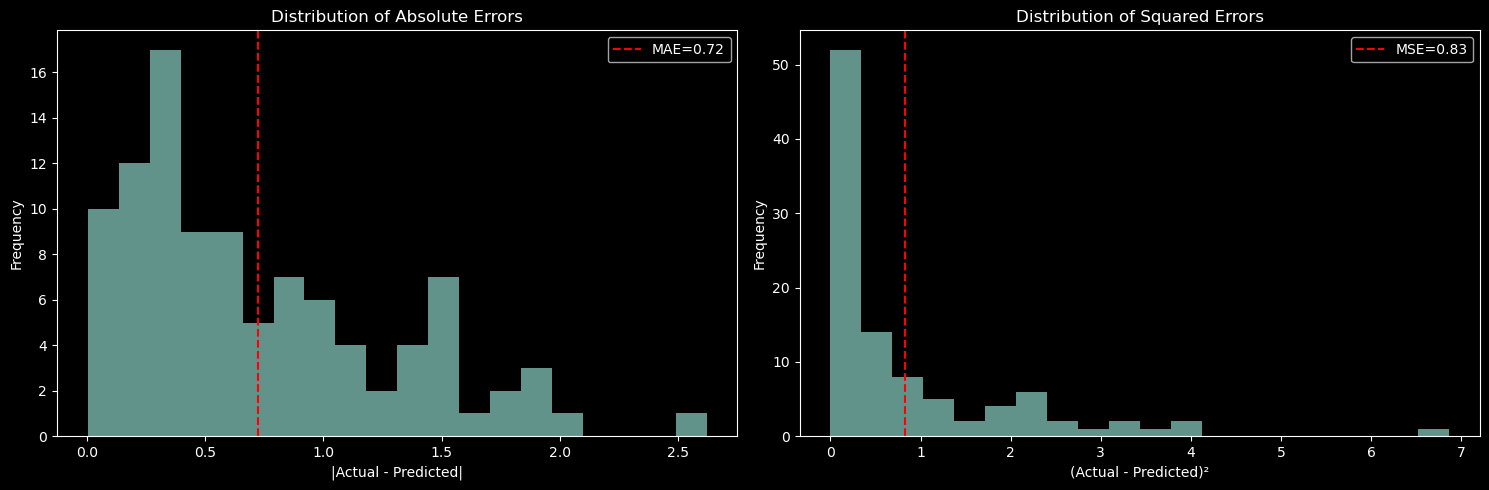

In [2]:
y_true = df['Y'].head(100)

# Generate predictions with random normal errors
np.random.seed(42)  # for reproducibility
errors = np.random.normal(0, 1, size=100)
y_pred = y_true + errors

# Calculate metrics
mae = np.mean(np.abs(y_true - y_pred))
mse = np.mean((y_true - y_pred)**2)

# Create side-by-side visualization
plt.figure(figsize=(15, 5))

# Plot absolute errors
plt.subplot(121)
plt.hist(np.abs(y_true - y_pred), bins=20, alpha=0.7)
plt.axvline(mae, color='r', linestyle='--', label=f'MAE={mae:.2f}')
plt.title('Distribution of Absolute Errors')
plt.xlabel('|Actual - Predicted|')
plt.ylabel('Frequency')
plt.legend()

# Plot squared errors
plt.subplot(122)
plt.hist((y_true - y_pred)**2, bins=20, alpha=0.7)
plt.axvline(mse, color='r', linestyle='--', label=f'MSE={mse:.2f}')
plt.title('Distribution of Squared Errors')
plt.xlabel('(Actual - Predicted)²')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

### Comparing MSE and MAE
There a couple key differences between MAE and MSE:

1. **Sensitivity to outliers.** The MSE is more sensitive to outliers than the MAE. This is because the MSE squares the errors, so that large errors are penalized more heavily. Similarly, errors less than $1$ are made even smaller when squared, resulting in the distribution on the right: lot's of values clustered near $0$, and long tail of outliers. In contrast, the MAE treats all errors equally, leading to a more spread out distribution of errors.
2. **Differentiability.** The MSE (considered as a function of the parameters $\mathbf{w}$) is differentiable everywhere, while the MAE is not differentiable at zero. This means that the MSE can be minimized using calculus, while the MAE cannot. This is a key reason why the MSE is more commonly used in practice, because for large datasets, the optimization algorithms used to minimize the loss function (namely, the method of gradient descent) require differentiability!

It turns out that both MSE and MAE loss functions arise naturally as notions of distance in linear algebra. First, let's review some basic facts about norms of vectors.

### Distance between points in $\mathbb{R}^m$
Vectors should usually be thought of as arrows starting at the origin. Very often, it is useful to visualize vectors with different starting points. When the starting point is not the origin, we refer to these as **displacement vectors.**

The term "displacement" arises because displacement vectors naturally arise in the context of physics: if an object starts at a point $P = (a_1,\dotsc,a_m)$ and ends at $Q = (b_1,\dotsc,b_m)$, then the displacement of the object is given by the displacement vector 
\begin{equation*}
    \vec{PQ} = \begin{bmatrix} b_1 - a_1 \\ \vdots \\ b_m - a_m \end{bmatrix} \in \mathbb{R}^m.
\end{equation*}

The **norm** or **magnitude** of a vector $\mathbf{v} = \begin{bmatrix} \; v_1 & \dotsb & v_m \; \end{bmatrix}^T \in \mathbb{R}^m$ is simply its length. The formula for the length is a generalization of the Pythagorean Theorem:
\begin{equation*}
    || \mathbf{v} ||^2 = v_1^2 + \dotsb + v_n^2.
\end{equation*}

If we have two vectors $\mathbf{u},\mathbf{v} \in \mathbb{R}^m$, then thinking of them as points, the displacement vector between them is $\mathbf{v} - \mathbf{u}$. The distance between them is therefore naturally defined as its length:
\begin{equation*}
    \textup{ Distance between $\mathbf{u}$ and $\mathbf{v}$ } = ||\mathbf{v} - \mathbf{u}|| = \sqrt{\sum_{i=1}^m (v_i - u_i)^2}.
\end{equation*}


**Remark.** The distance formula above is sometimes called the *Euclidean norm* or *$L_2$-norm*. There are other norms that can be used to measure the length of a vector. The most common ones are:

- **$L_1$-norm:** 
This is the sum of the absolute values of the entries:
$$||\mathbf{v}||_1 = |v_1| + \dotsb + |v_m|.$$ 
This is also called the *Manhattan norm* or *Taxicab norm* because it measures the distance between two points in a city if you can only travel along the grid of streets.
- $L_{\infty}$**-norm:** 
This is the maximum of the absolute values of the entries: $$ ||\mathbf{v}||_{\infty} = \max \{|v_1|,\dotsc,|v_m|\}. $$  
This is also called the *supremum norm* or *maximum norm*.

### MSE and MAE as distances in $\mathbb{R}^m$
Let us package together all the true target values $y_i$, predictions $\hat{y}_i = F_{\mathbf{w}}(\mathbf{x}_i)$, and residuals $\epsilon_i$ into vectors $\mathbf{y},\hat{\mathbf{y}},\epsilon \in \mathbb{R}^m$. By definition, we have
\begin{equation*}
    \epsilon = \mathbf{y} - \hat{\mathbf{y}} +  \in \mathbb{R}^m.
\end{equation*}
This is pictured in the following diagram:

<img src="assets/residual-diagram.png" width="60%"></img>

Observe then that the MSE is the squared $L_2$-norm of the residual vector, and the MAE is the $L_1$-norm of the residual vector:
\begin{equation*}
    \begin{alignedat}{2}
        \textup{MSE}(\mathbf{w}) & = \frac{||\epsilon||^2}{m}  && = \dfrac{|| \mathbf{y} - \hat{\mathbf{y}} ||_2^2}{m} ,\\
        \phantom{ } & && \\
        \textup{MAE}(\mathbf{w}) & = \frac{||\epsilon||_1}{m}  && = \dfrac{|| \mathbf{y} - \hat{\mathbf{y}} ||_1}{m} .
    \end{alignedat}
\end{equation*}

## Linear regression 

### The linear model
The linear regression model is a simple yet powerful tool for predicting a continuous target variable. Suppose we have a dataset with $n$ features $X_1,\dotsc,X_n$ and a target $Y$ (and $m$ instances). The linear regression model assumes that the target is a *linear function* of the features, plus some small noise term. Thus, the function $F_{\mathbf{w}}$ is the linear function from $\mathbb{R}^n \to \mathbb{R}$ defined by
\begin{equation*}
    F_{\mathbf{w}}(X_1,\dotsc,X_n) = b + w_1 X_1 + \dotsb + w_n X_n.
\end{equation*}
Each $w_i$ can be interpreted as the weight or importance of the $i$-th feature in predicting the target; If all other features are held constant, then a one-unit increase in $X_i$ will result in a $w_i$-unit increase in the target. (Can you rephrase this in terms of partial derivatives?)  The parameter $b$ is called the **bias** or **intercept** term. It can be interpreted as the expected value of the target when all features are zero. Putting them all together, a linear model assumes that the target is a constant (the bias), plus a wighted sum of the features, plus some noise.

### MSE loss for linear regression
Linear functions are in one-to-one correspondence with vectors of parameters $$\mathbf{w} = \begin{bmatrix} \; b & w_1 & \dotsb & w_n \; \end{bmatrix} \in \mathbb{R}^{n+1}.$$
Thus, the parameter space for our model is $\mathbb{R}^{n+1}$. The prediction $\hat{y}_i$ for the $i$-th instance is given by
\begin{align*}
    \hat{y}_i & = F_{\mathbf{w}}(x_{i1},\dotsc,x_{in}) \\
    & = b + w_1 x_{i1} + \dotsb + w_n x_{in}.
\end{align*}
Thus, the $i$-th residual is given by
\begin{align*}
    \epsilon_i & = y_i - \hat{y}_i \\
    & = y_i - (b + w_1 x_{i1} + \dotsb + w_n x_{in}).
\end{align*}
We take as our loss function $J(\mathbf{w})$ the MSE (which is the standard choice for linear regression). Thus, we have
\begin{align*}
    J(\mathbf{w}) & = \frac{1}{m} \sum_{i=1}^m \epsilon_i^2 \\
                & = \frac{1}{m} \sum_{i=1}^m (y_i - (b + w_1 x_{i1} + \dotsb + w_n x_{in}))^2.
\end{align*}
(NOTE: If we wish to emphasize that the loss depends on the parameters $\mathbf{w}$ *and also* the design matrix $X$, we write $J(\mathbf{w};X)$.)

### Fitting the linear model

In order to fit our linear model to the dataset, we need to find the special parameters $\hat{\mathbf{w}} = (\hat{b}, \hat{w}_1 , \dotsc, \hat{w}_n) \in \mathbb{R}^{n+1}$ that minimize the MSE loss function:
\begin{align*}
    \hat{\mathbf{w}}&  = \argmin_{\mathbf{w} \in \mathbb{R}^{n+1}} J(\mathbf{w}) \\
    & = \argmin_{\mathbf{w} \in \mathbb{R}^{n+1}} \frac{1}{m} \sum_{i=1}^m \epsilon_i^2 \\
    & = \argmin_{\mathbf{w} \in \mathbb{R}^{n+1}} \frac{1}{m} \sum_{i=1}^m (y_i - (b + w_1 x_{i1} + \dotsb + w_n x_{in}))^2.
\end{align*}

To accomplish this, there are (broadly speaking) two approaches:

1. **Analytical solution.** We can use calculus to find the (location of the) minimum of the loss function! This is possible because of some very useful properties of the function $J(\mathbf{w})$:
    - It is differentiable everywhere, which means that we can use calculus to find the minimum. Namely, we can compute the **gradient** of the loss function, which is a vector of partial derivatives of the loss function with respect to each parameter:
    \begin{equation*}
        \nabla J(\mathbf{w}) = \begin{bmatrix} \; \frac{\partial J}{\partial b} & \frac{\partial J}{\partial w_1} & \dotsb & \frac{\partial J}{\partial w_n} \; \end{bmatrix}.
    \end{equation*}
    Note that each entry in $\nabla J(\mathbf{w})$ is itself a function of $\mathbf{w}$. Like all local minima/maxima of differentiable functions, the minimum of $J(\mathbf{w})$ occurs at a point where the gradient is zero. Thus, a first step in finding the minimum is to compute the gradient and set it equal to zero:
    \begin{equation*}
        \textup{Compute and set }\; \frac{\partial J}{\partial b} = \dotsb = \frac{\partial J}{\partial w_n} = 0.
    \end{equation*}
    - Each partial derivative turns out to be a *linear* function of the parameters $\mathbf{w}$, so finding the parameters $\mathbf{w}$ for which $\nabla J(\mathbf{w}) = 0$ amounts to solving a system of linear equations.
    - It is a **convex function**, which means that the minimum is unique! In particular, this means if we find a minimum by setting the gradient to zero, then we have found the global minimum of the loss function!
2. **Linear algebra solution.** We can use linear algebra to find the minimum of the loss function. This approach requires us to understand the geometry of the problem. Upon deconstructing what we want using the language of orthogonal projections, find the parameters $\hat{\mathbf{w}}$ amounts to inverting and multiplying certain matrices!
3. **Gradient descent.** We can use a numerical optimization algorithm to find the minimum of the loss function. This approach is useful when the dataset is too large to fit in memory, or when the loss function is not differentiable. The most common algorithm for this is called **gradient descent**, which we will discuss in detail later. NOTE: This method is the most general out of the three, and can be applied to any reasonably nice model and loss function for regression. In particular, when we use neural networks to solve regression problems, we will use gradient descent (implemented cleverly in an algorithm known as **back-propagation**) to find the best parameters.
    
### Dot products
In the next lecture, we derive the formulas for the best fit parameters in the simplest case of linear regression, aptly called **simple linear regression**; this is when we have only one features $X$ and one target $Y$. Following up on that, we derive the formulas for the general case. 

Before we get to that, now is a great time to recall the notion of a **dot product** of two vectors $\mathbf{u},\mathbf{v} \in \mathbb{R}^m$; it is the sum of the products of their corresponding entries:
\begin{equation*}
    \mathbf{u} \cdot \mathbf{v} = u_1v_1 + \dotsb + u_mv_m.
\end{equation*}
Note that $\mathbf{u}^T$ can be thought of as a $1 \times n$ matrix, and $\mathbf{v}$ can be thought of as an $n \times 1$ matrix. Then, the dot product is simply given by matrix multiplication:
\begin{align*}
    \mathbf{u} \cdot \mathbf{v} & = \mathbf{u}^T \mathbf{v} \\
                                & = \mathbf{v}^T \mathbf{u} \; \in \mathbb{R}.
\end{align*}
You might notice right away that norms can be expressed in terms of dot products:
\begin{equation*}
    ||\mathbf{u}||^2 = \mathbf{u} \cdot \mathbf{u} = \mathbf{u}^T \mathbf{u}.
\end{equation*}
In general, whenever you see a sum of products of the form $u_1v_1 + \dotsb + u_mv_m$, you should (immediately and without hesitation) think of it as a dot product $\mathbf{u} \cdot \mathbf{v}$; more often than not, this viewpoint yields conceptual benefits, the reason being that the dot product encodes a LOT of useful information about how vectors are situated in space relative to each other. 

**Example.** One of the most important and frequently recurring customers in the dot product business is the **all-ones vector**
\begin{equation*}
    \mathbf{1} = \begin{bmatrix} \; 1 & 1 & \dotsb & 1 \; \end{bmatrix}^T \in \mathbb{R}^m.
\end{equation*}
For any vector $\mathbf{u} \in \mathbb{R}^m$, we have $\mathbf{1} \cdot \mathbf{u} = \sum_{i=1}^m u_i$. Thus, if $\overline{\mathbf{u}} \in \mathbb{R}$ denotes the mean of the entries of $\mathbf{u}$, then we have
\begin{equation*}
    \mathbf{1} \cdot {\mathbf{u}} = m \overline{\mathbf{u}}.
\end{equation*}

**Example** The following example illustrates how to compute the dot product of two vectors in Python using vectorized code.

In [3]:
# computing dot products of columns and rows in `df`

# dot product of columns X1 and X2
dot_col = np.dot(df['X1'], df['X2'])

# dot product of rows 1 and 2
dot_row = np.dot(df.iloc[0, :-1], df.iloc[1, :-1])

# display the results
print(f'Dot product of columns X1 and X2: {dot_col}')
print(f'Dot product of rows 1 and 2: {dot_row}')

Dot product of columns X1 and X2: 15170824.290000003
Dot product of rows 1 and 2: 1729129.47


### A different view of the dot product
The algebraic formula for the dot product is short and sweet. Incredibly enough, there is another way to define the dot product, which is even more geometric in nature. Namely, if $\mathbf{u},\mathbf{v} \in \mathbb{R}^m$ are two vectors, then the dot product is given by
\begin{equation*}
    \mathbf{u} \cdot \mathbf{v} = ||\mathbf{u}|| \cdot ||\mathbf{v}|| \cdot \cos(\theta),
\end{equation*}
where $\theta$ is the angle between the two vectors. (To make sense of the phrase "angle between the two vectors", you need to visualize the plane spanned by the two vectors!)

Since $\cos \theta$ ranges between $-1$ and $1$, we can see the following properties:

1. $\mathbf{u} \cdot \mathbf{v} = 0$ if and only if $\theta = 90^{\circ}$. When this holds, we say that the vectors are **orthogonal**.
2. $\mathbf{u} \cdot \mathbf{v} > 0$ if and only if $\theta < 90^{\circ}$, i.e. the two vectors point roughly in the same direction (this can be made more precise using the terminology of "half-spaces").
3. $\mathbf{u} \cdot \mathbf{v} < 0$ if and only if $\theta > 90^{\circ}$, i.e. the two vectors point roughly in opposite directions.